# Привет! Тут мы анализируем русскоязычные твиты :)

#### Датасет:
https://drive.google.com/drive/folders/0BxlA8wH3PTUfV1F1UTBwVTJPd3c    
#### Задания:
1. Успешно запустить имеющийся ноутбук
2. Вместо BoW попробовать tf-idf, сравнить результаты
3. Попробовать предобученные эмбеддинги для слов:
    - скачать модель fasttext http://vectors.nlpl.eu/repository/11/181.zip
    - установить пакет gensim для использования предобученной модели
    - загрузить модель и сгенерировать эмбеддинги для каждого слова в твите + затем усреднить вектора https://github.com/RaRe-Technologies/gensim-data/issues/27
    - визуализировать результат
4. Вместо TSNE можно пробовать использовать другие методы уменьшения размерности данных: PCA, Umap.
5. Полученные визуализации показать преподавателю    

Если будут вопросы - обращайтесь :)

## I. Импортим нужные библиотеки

In [1]:
import xmltodict
import re

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

## II. Определяем функции с парсингом входных данных

In [2]:
companies = {}
def get_sample_text(sample):
    assert sample['column'][3]['@name'] == 'text'
    return sample['column'][3]['#text']


def get_sample_answers_bank(sample):
    answers = {}
    for i in range(4, 12):
        companies[sample['column'][i]['@name']] = i
        answers[sample['column'][i]['@name']] = None if sample['column'][i]['#text'] == 'NULL'\
            else int(sample['column'][i]['#text'])
    return answers

def get_sample_answers_tkk(sample):
    answers = {}
    for i in range(4, 11):
        companies[sample['column'][i]['@name']] = i
        answers[sample['column'][i]['@name']] = None if sample['column'][i]['#text'] == 'NULL'\
            else int(sample['column'][i]['#text'])
    return answers

def get_sample_id(sample):
    assert sample['column'][0]['@name'] == 'id'
    return int(sample['column'][0]['#text'])


def get_data(filename):
    df = pd.DataFrame()
    with open(filename, "r", encoding='utf-8') as f:
        d = xmltodict.parse(f.read(), process_namespaces=True)
        clean_samples = []
        for sample in d['pma_xml_export']['database']['table']:
            sample_id = get_sample_id(sample)
            text = get_sample_text(sample)
            answers = get_sample_answers_bank(sample)
            for company, answer in answers.items():
                if answer is not None:
                    clean_samples.append((sample_id, text, company, answer))
        df['text'] = [sample[1] for sample in clean_samples]
        df['answer'] = [sample[3] for sample in clean_samples]
        df['company'] = [sample[2] for sample in clean_samples]
        df['sample_id'] = [sample[0] for sample in clean_samples]
    return df

## III. Обрабатываем наши данные

In [3]:
train_filename = "/home/ds/DataScience/Datasets/SentiRuEval_2016/bank_train_2016.xml"
test_filename = "/home/ds/DataScience/Datasets/SentiRuEval_2016/banks_test_etalon.xml"

train = get_data(train_filename)
test = get_data(test_filename)

## IV. Заменяем все ссылки и юзернеймы на url и user соответственно

In [4]:
url_replacement = lambda x: re.sub(r'(?:http[^\s]+)($|\s)', r'url\1', x)
user_replacement = lambda x: re.sub(r'(?:@[^\s]+)($|\s)', r'user\1', x)

train['text'] = train['text'].apply(url_replacement)
train['text'] = train['text'].apply(user_replacement)

test['text'] = test['text'].apply(url_replacement)
test['text'] = test['text'].apply(user_replacement)

In [5]:
train.head()

,text,answer,company,sample_id
0,url Взять кредит тюмень альфа банк,0,alfabank,1
1,Мнение о кредитной карте втб 24 url,0,vtb,2
2,«Райффайзенбанк»: Снижение ключевой ставки ЦБ ...,0,raiffeisen,3
3,Современное состояние кредитного поведения в р...,0,sberbank,4
4,user user Главное чтоб банки СБЕР и ВТБ!!!,1,sberbank,5


In [6]:
train['answer'].value_counts()

 0    7158
-1    2807
 1     760
Name: answer, dtype: int64

In [7]:
test.head()

,text,answer,company,sample_id
0,#Автокредит в россельхозбанк в череповце,0,rshb,1
1,RT user url #Кредитный калькулятор россельхозб...,0,rshb,2
2,#Автокредит в россельхозбанк 2012 url,0,rshb,3
3,RT user #Кредитные карты россельхозбанк url,0,rshb,4
4,RT user #Кредиты в россельхозбанке ижевск url,0,rshb,5


## V. BoW векторайзер с 100 самыми частотными словами

In [8]:
vectorizer = CountVectorizer(max_features=100)

In [9]:
X = vectorizer.fit_transform(train['text'])

In [10]:
X.shape

(10725, 100)

## VI. Смотрим на результаты

In [11]:
decomposition = TSNE(n_components=2)

In [12]:
%%time
X_embedded = decomposition.fit_transform(X.toarray())

CPU times: user 2min 56s, sys: 3.29 s, total: 2min 59s
Wall time: 1min 6s


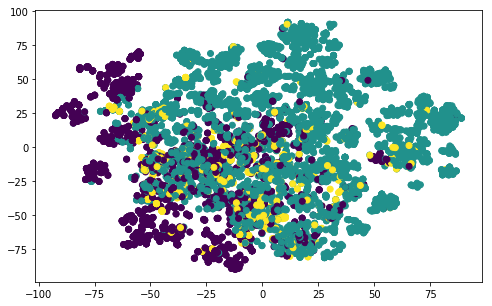

CPU times: user 713 ms, sys: 21 ms, total: 734 ms
Wall time: 363 ms


In [12]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(*np.transpose(X_embedded), c=train['answer'])
plt.show()

.    
.    
.    
.    
.    
.    
.    
.    
.    
.    
.    
.    
.    
.    
.    
.    
.    
.    
.    
.    
.    
.    
.    
.    
.    
.    
.    
.    
.    
.    
